In [74]:
#create at least 4 new variables
#population: create categorical
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
sns.set(style='whitegrid',palette='muted', color_codes=True)
sns.set_context('talk')

In [75]:
with open('df.pickle','rb') as file:
    df=pickle.load(file)

In [92]:
df.head()

,country,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population,excess_carbon,percapbuilt,interact,interact2
2,Armenia,1992,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,949.033,3449000,1.112224,9.761824e-09,0.000009,0.001617
12,Armenia,1993,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,886.033,3370000,0.535266,9.485933e-09,0.000008,0.001475
22,Armenia,1994,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,956.471,3290000,0.317646,9.567022e-09,0.000009,0.001678
32,Armenia,1995,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1043.540,3223000,0.416163,9.772681e-09,0.000010,0.001493
42,Armenia,1996,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1121.880,3173000,0.334663,1.115981e-08,0.000013,0.001338


In [113]:
df['percapbuilt']=df['built_up_land']/df['population']
df['landtypeInter']=df['crop_land']*df['grazing_land']*df['fishing_ground']*df['built_up_land']
#ALSO ENGINEERED THE FEATURE EXCESS_CARBON
df['fishcrop']=df['fishing_ground']*df['crop_land']

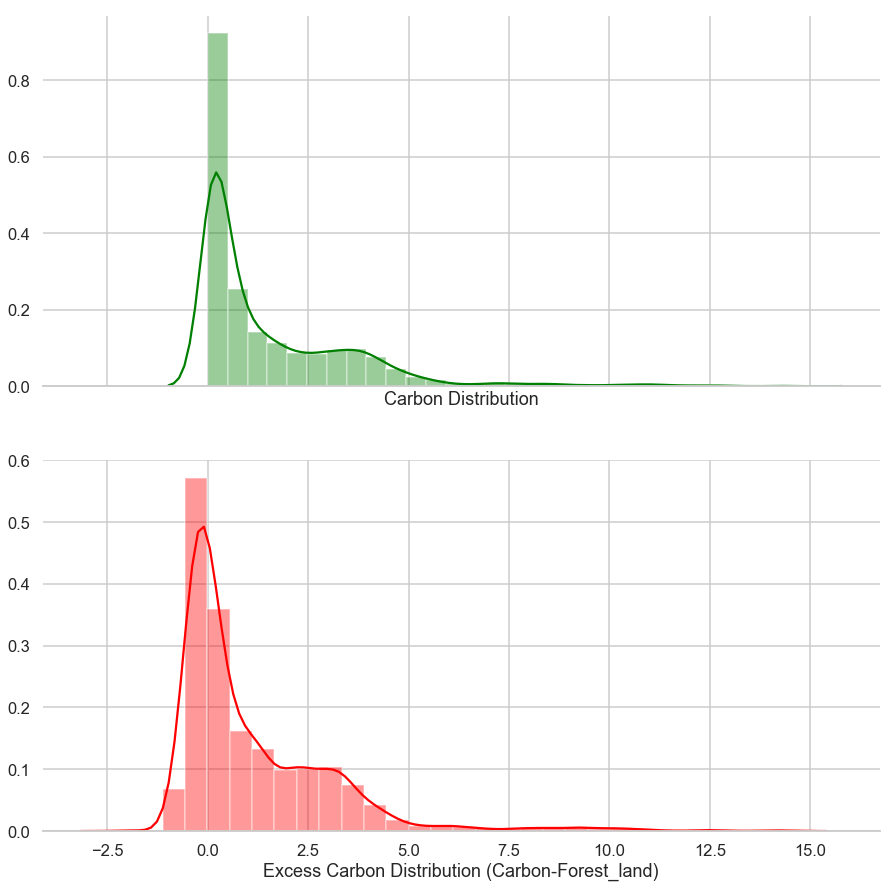

In [78]:
fig, axes = plt.subplots(2,1,figsize=(15,15),sharex=True)
sns.despine(left=True)
sns.distplot(df['carbon'],bins=30,axlabel='Carbon Distribution',ax=axes[0],color='green')
sns.distplot(df['excess_carbon'],bins=30,axlabel='Excess Carbon Distribution (Carbon-Forest_land)',ax=axes[1],color='red')
fig.savefig('TargetDistplots.png', bbox_inches='tight')

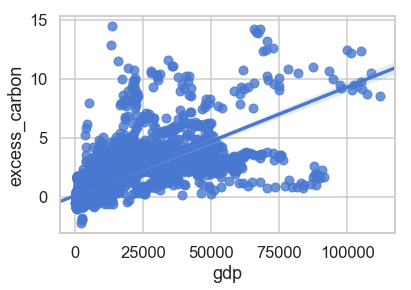

In [58]:
sns.regplot(x='gdp',y='excess_carbon',data=df)

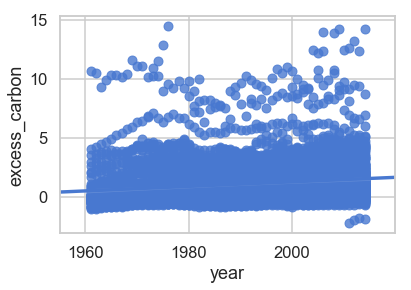

In [59]:
sns.regplot(x='year',y='excess_carbon',data=df)

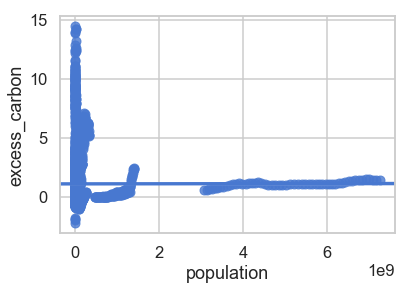

In [60]:
sns.regplot(x='population',y='excess_carbon',data=df)

In [108]:
# sns.pairplot(df)

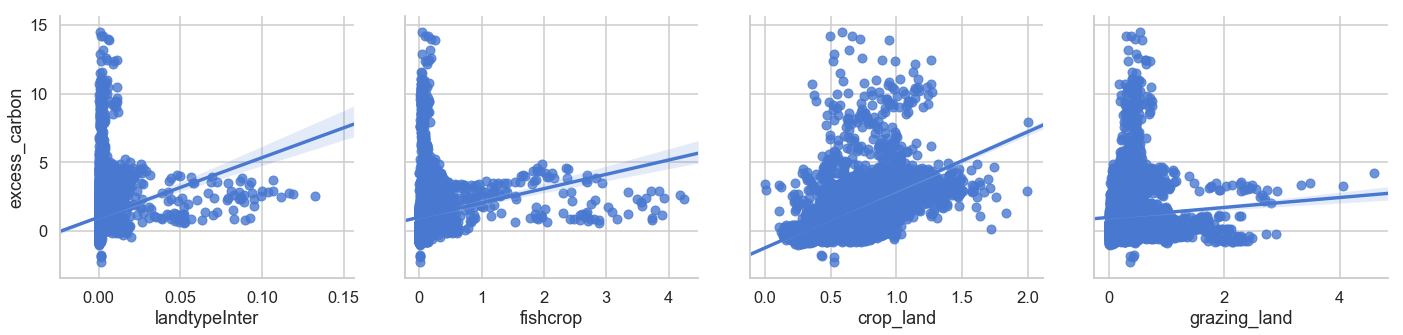

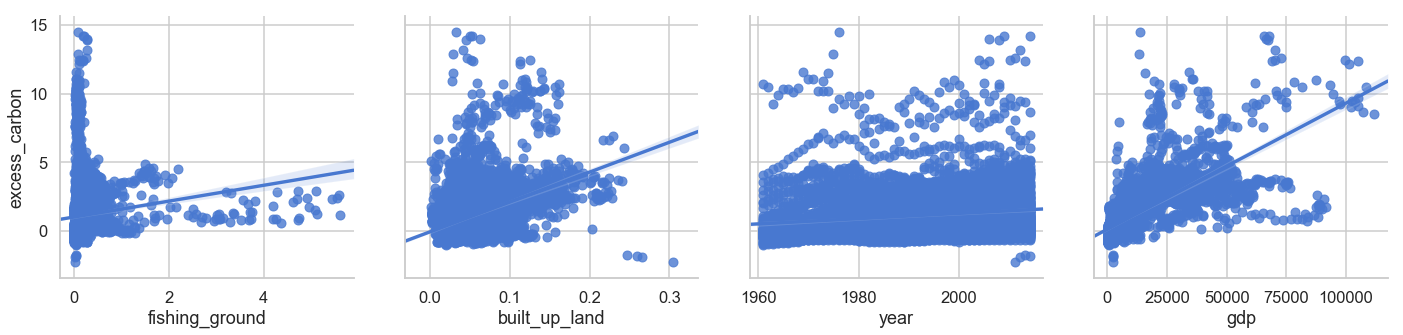

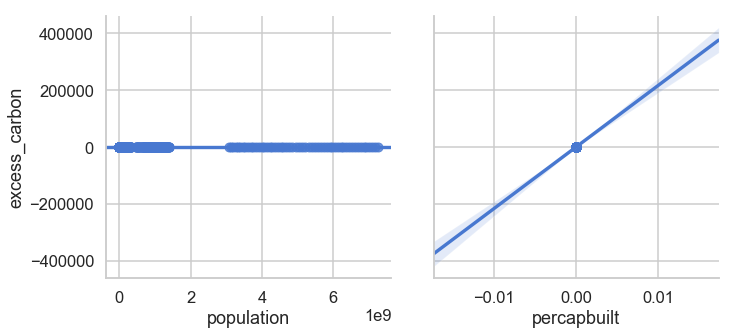

In [114]:
features=['landtypeInter','fishcrop','crop_land','grazing_land','fishing_ground','built_up_land','year','gdp','population','percapbuilt']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    sns.pairplot(df, y_vars='excess_carbon',x_vars=i,kind='reg',height=5)

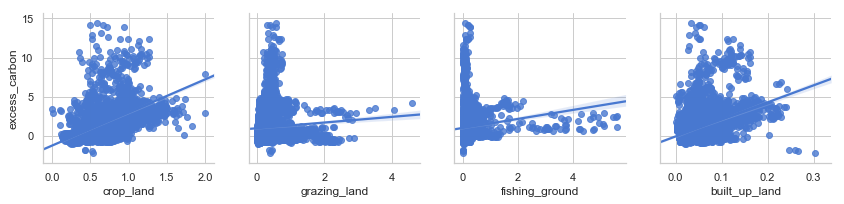

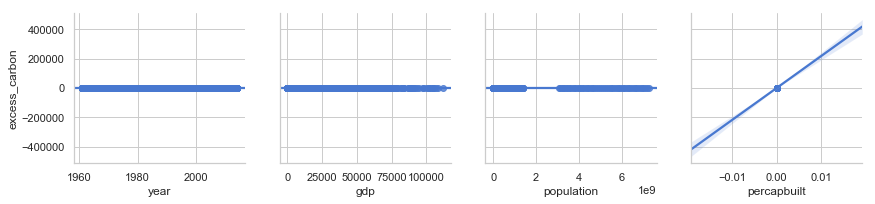

In [28]:
features=['crop_land','grazing_land','fishing_ground','built_up_land','year','gdp','population','percapbuilt']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    sns.pairplot(data=df, y_vars=['excess_carbon'],x_vars=i,kind='reg',height=3)

In [33]:
df['excess_carbon'].describe()
# dfa.hist(column=['carbon'], bins=30)
df.columns

Index(['country', 'year', 'record', 'crop_land', 'grazing_land', 'forest_land',
       'fishing_ground', 'built_up_land', 'carbon', 'gdp', 'population',
       'excess_carbon', 'percapbuilt'],
      dtype='object')

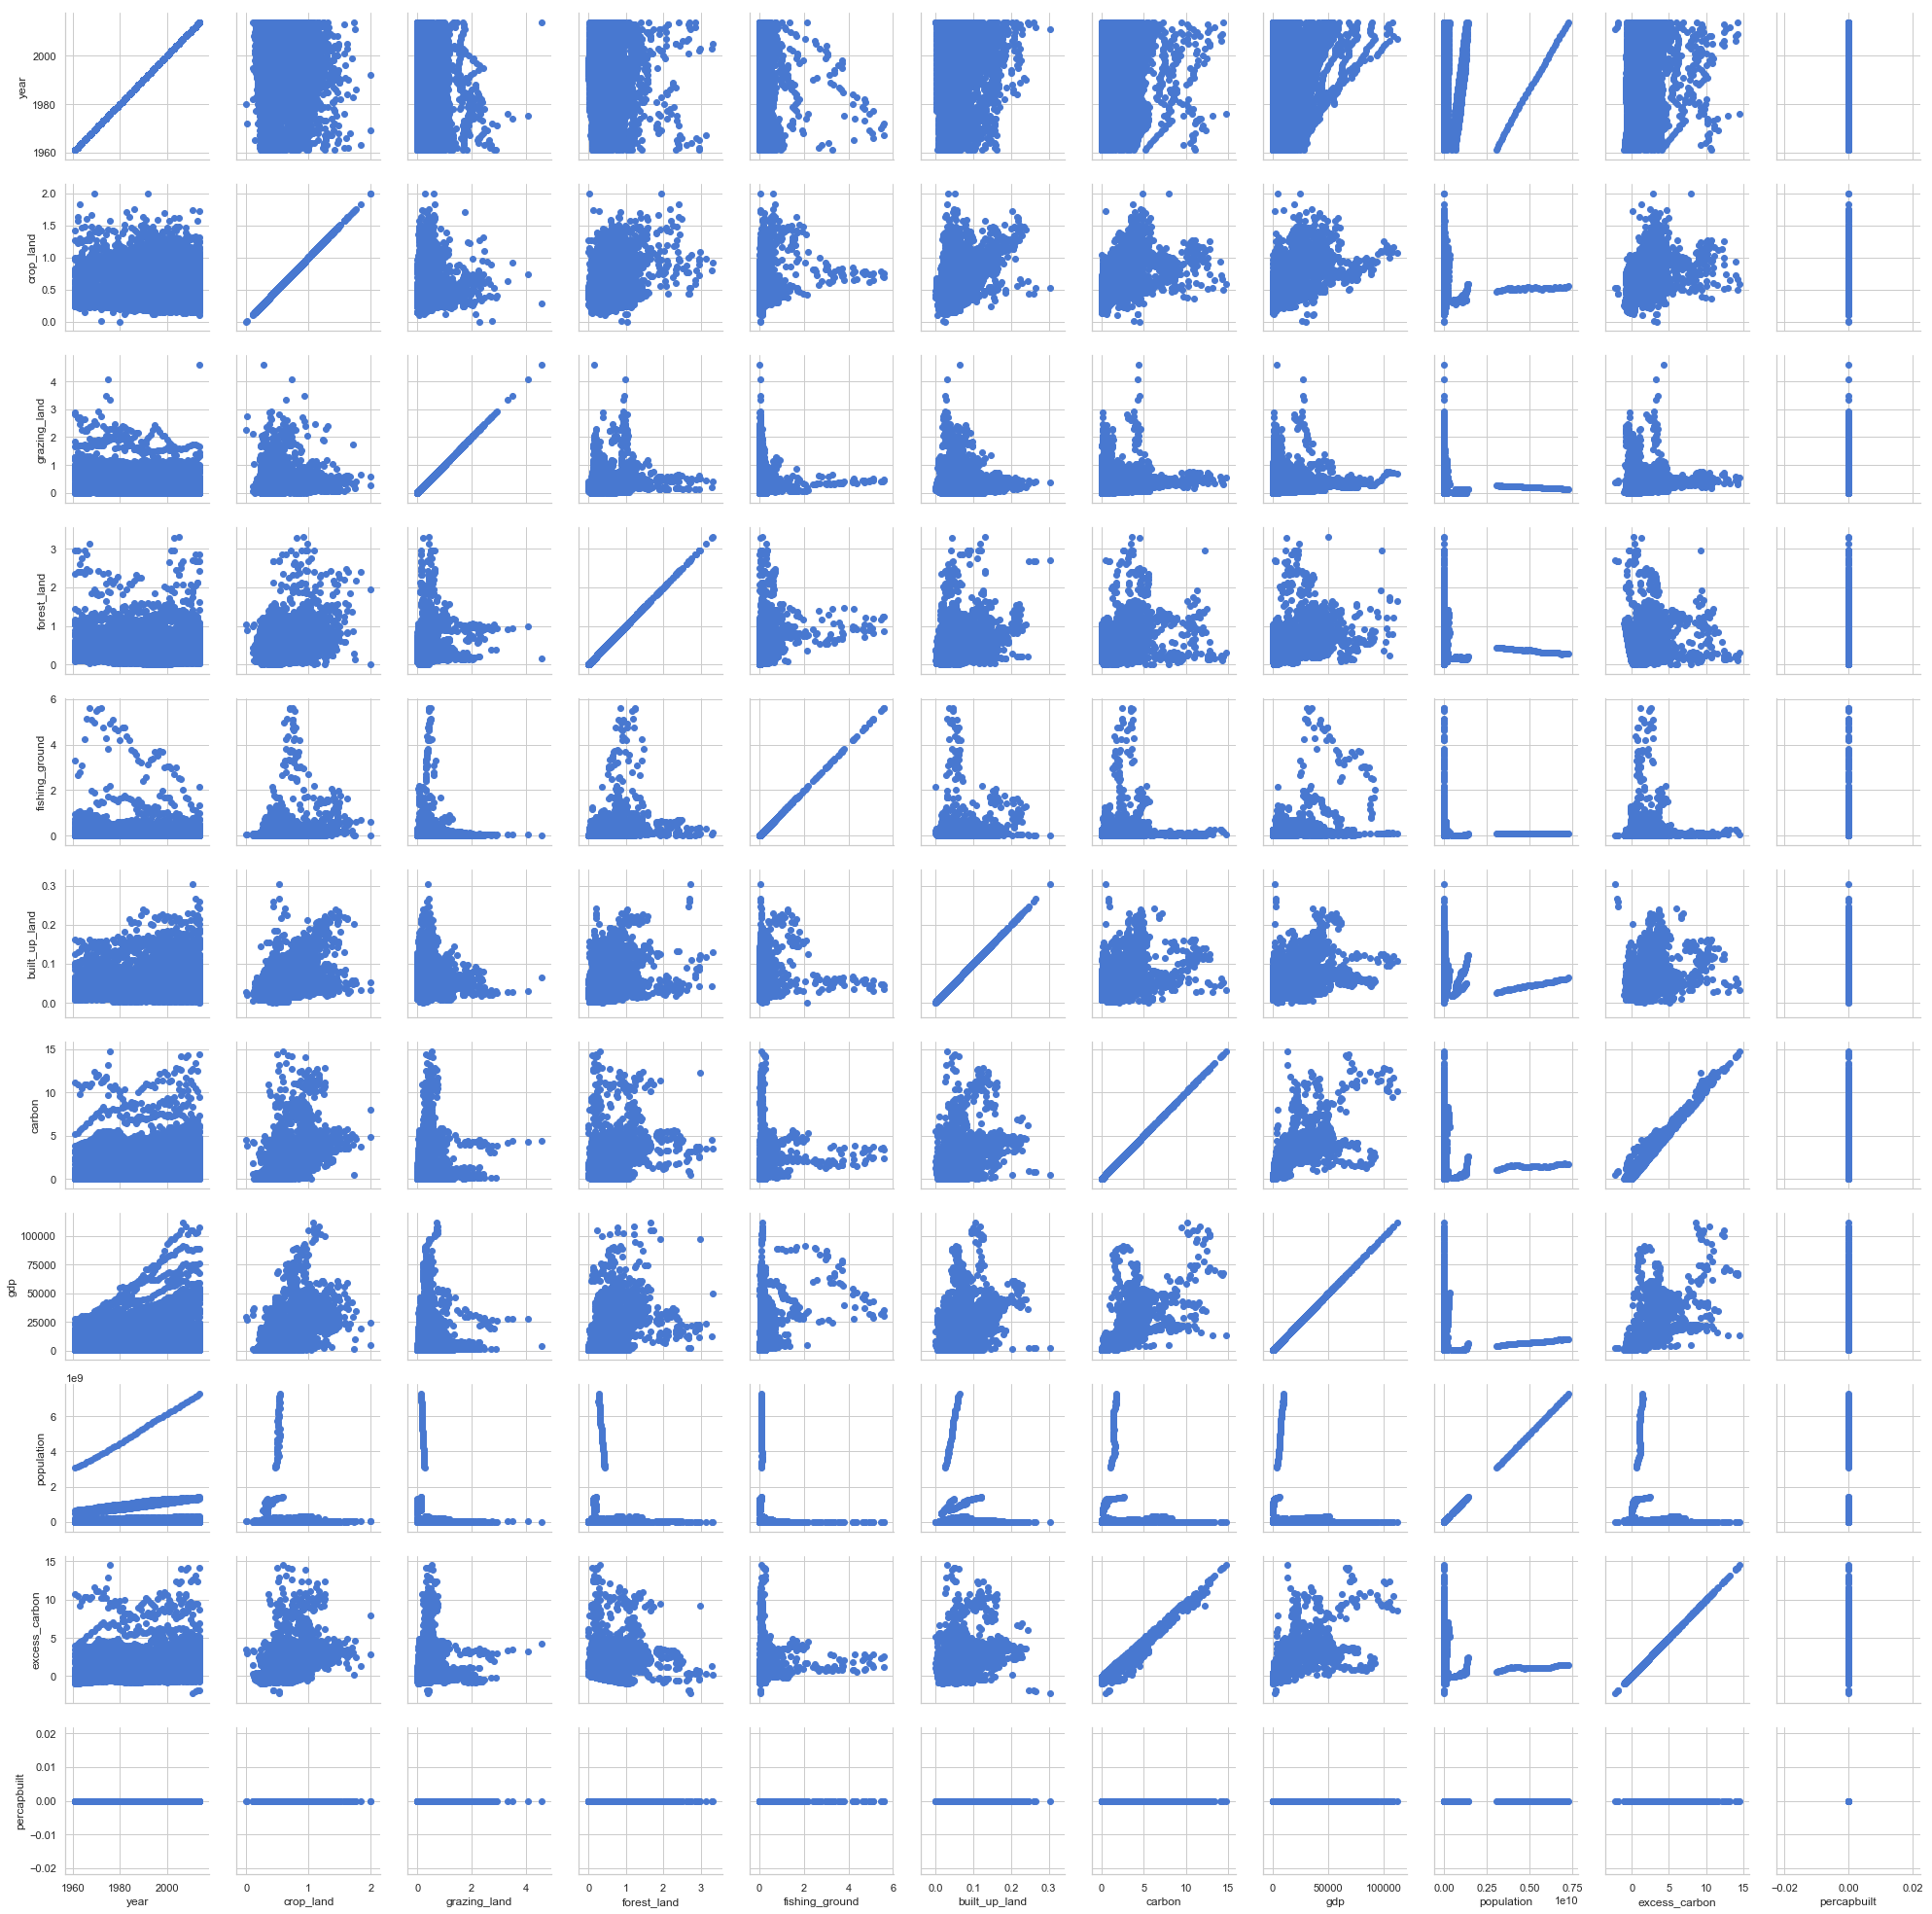

In [30]:
# sns.pairplot(data=dfa)
sns.PairGrid(df).map(plt.scatter)

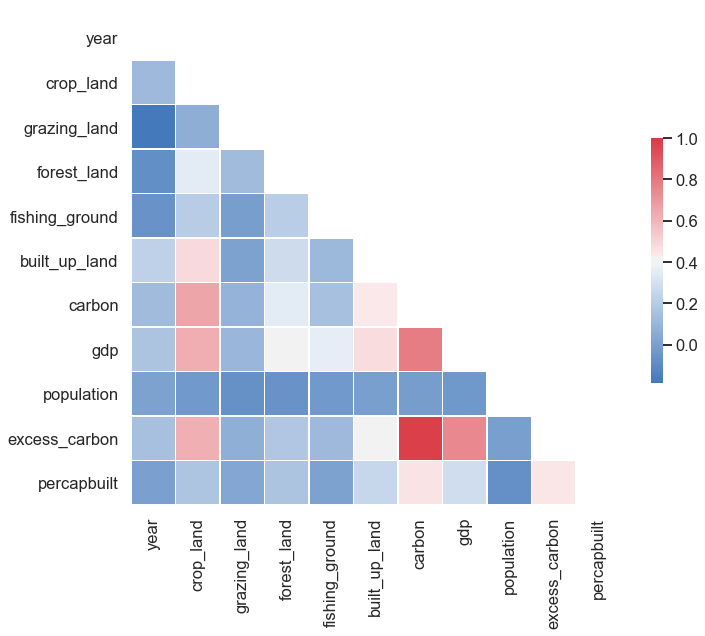

In [71]:
corr=df.corr()
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    return f


CorrMtx(corr, dropDuplicates = True).savefig('CorrelationMatrix', bbox_inches='tight')

In [41]:
model=smf.ols('excess_carbon~gdp+crop_land+percapbuilt+fishing_ground',data=df).fit() #R-sq: 62.2% all pvals low (0.00)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_carbon   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2853.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:47:08   Log-Likelihood:                -8195.0
No. Observations:                5413   AIC:                         1.640e+04
Df Residuals:                    5408   BIC:                         1.643e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6845      0.035    -19.806      0.000      -0.752      -0.617
gdp              7.01e-05   1.32e-06     53.260      0.000    6.75e-05    7.27e-05
crop_land          1.6966      0.067     25.256      0.000       1.565       1.828
percapbuilt      1.18e+07   3.89e+05     30.290      0.000     1.1e+07    1.26e+07
fishing_ground    -0.6655      0.040    -16.844      0.000      -0.743      -0.588
==============================================================================
Omnibus:                     2678.672   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52632.182
Skew:                           1.903   Prob(JB):                         0.00
Kurtosis:                      17.794   Cond. No.                     4.98e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.98e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
fig, ax = plt.subplots(figsize=(30,21))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

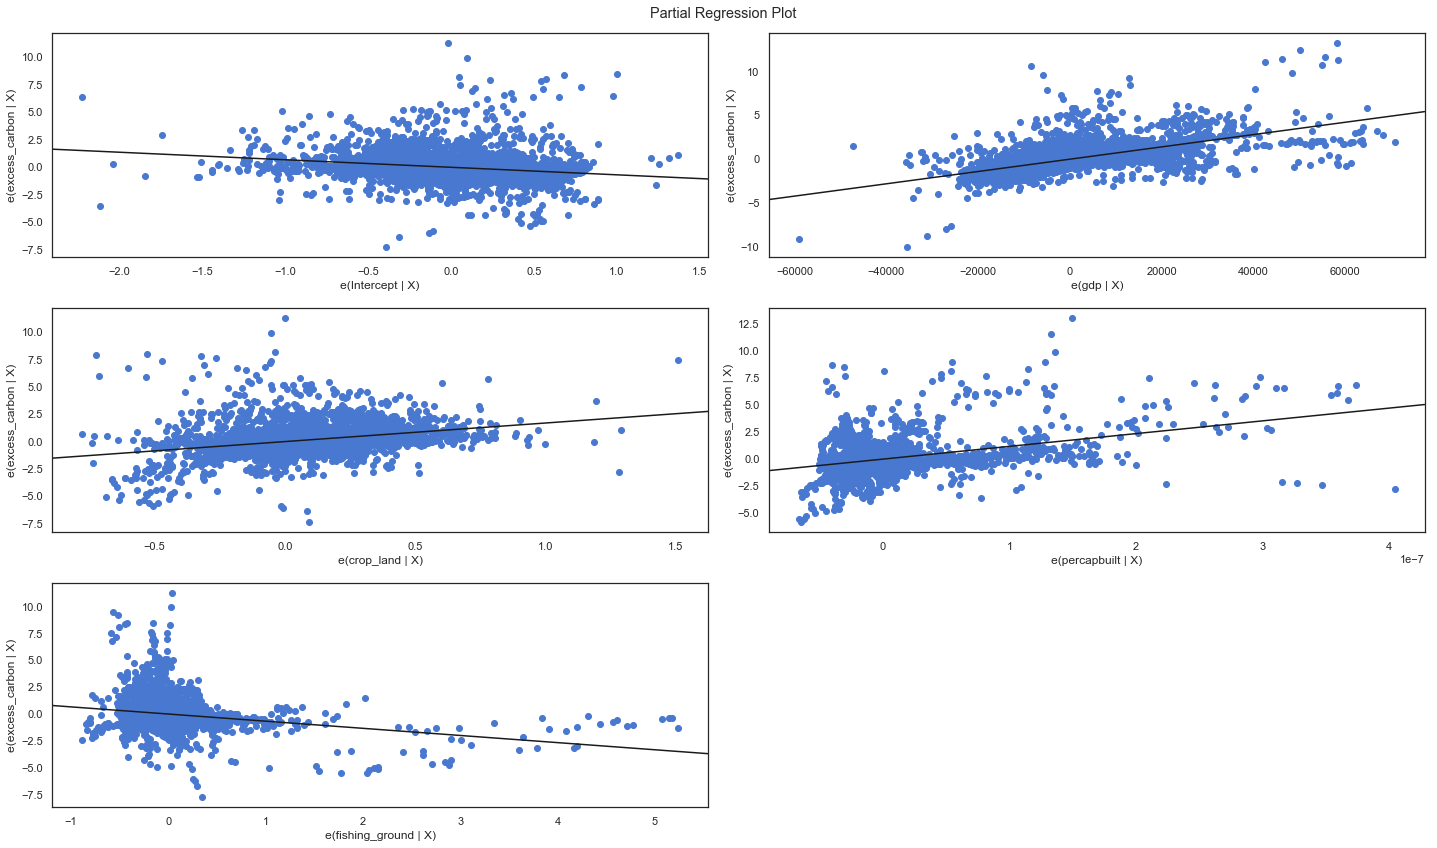

In [36]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [ ]:
fig = plt.figure(figsize=(20,12))
fig = df.boxplot()

In [17]:
x=[df['gdp'],df['crop_land'],df['percapbuilt'],df['fishing_ground']]

In [ ]:
sns.regplot(x='gdp',y='excess_carbon',data=df,x_estimator=np.mean,lowess=True)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

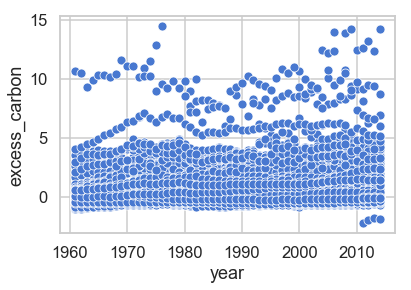

In [85]:
sns.scatterplot(x='year',y='excess_carbon', data=df).savefig('YearVExCarbon.png', bbox_inches='tight')

In [80]:
import scipy.stats
stats.pearsonr(df['crop_land'],df['population'])

(-0.027164347646904514, 0.045665484593592744)

In [98]:
# df['interact']=df['gdp']*df['percapbuilt']
# df['interact2']=df['crop_land']*df['fishing_ground']
# df['inti']=df['crop_land']*df['fishing_ground']*df['built_up_land']*df['grazing_land']
df['popgdp']=df['population']*df['gdp']

In [99]:
model=smf.ols('excess_carbon~popgdp+crop_land+fishing_ground+percapbuilt',data=df).fit() #R-sq: 62.2% all pvals low (0.00)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_carbon   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     1171.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:23:22   Log-Likelihood:                -9912.2
No. Observations:                5413   AIC:                         1.983e+04
Df Residuals:                    5409   BIC:                         1.986e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2485      0.045    -27.913      0.000      -1.336      -1.161
popgdp          2.735e-14   4.83e-15      5.658      0.000    1.79e-14    3.68e-14
crop_land          4.2135      0.073     57.433      0.000       4.070       4.357
fishing_ground    -0.0347      0.051     -0.674      0.500      -0.136       0.066
percapbuilt     1.041e-07   1.79e-09     58.304      0.000    1.01e-07    1.08e-07
==============================================================================
Omnibus:                     3667.092   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62053.127
Skew:                           3.039   Prob(JB):                         0.00
Kurtosis:                      18.433   Cond. No.                     1.09e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.45e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
df['landtypeInter']=df['crop_land']*df['grazing_land']*df['fishing_ground']*df['built_up_land']

In [107]:
model=smf.ols('excess_carbon~gdp+landtypeInter+percapbuilt+population',data=df).fit() #R-sq: 62.2% all pvals low (0.00)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_carbon   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2539.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:38:13   Log-Likelihood:                -8887.8
No. Observations:                5413   AIC:                         1.778e+04
Df Residuals:                    5409   BIC:                         1.781e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1002      0.021      4.816      0.000       0.059       0.141
gdp               0.0001    1.2e-06     84.021      0.000    9.89e-05       0.000
landtypeInter   -35.3381      2.069    -17.077      0.000     -39.395     -31.281
percapbuilt    1.467e-05   8.59e-07     17.078      0.000     1.3e-05    1.64e-05
population     8.824e-11   3.16e-11      2.790      0.005    2.62e-11     1.5e-10
==============================================================================
Omnibus:                     2787.105   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55770.931
Skew:                           2.005   Prob(JB):                         0.00
Kurtosis:                      18.205   Cond. No.                     1.42e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.97e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""